# Projektni zadatak: Segmentacija fotografije
Segmentacija fotografije je proces podele digitalne fotografije na vi≈°e segmenata (skupova piksela) odnosno razliƒçitih regiona ili kategorija, pri ƒçemu svaka regija sadr≈æi piksele sa sliƒçnim atributima, a svaki piksel na fotografiji dodeljuje se jednoj od ovih kategorija. Segmentacija fotografije je zapravo postupak dodeljivanja oznake svakom pikselu na fotografiji tako da pikseli sa istom oznakom dele odreƒëene karakteristike.

Cilj segmentacije je pojednostavljivanje i/ili promena prikaza fotografije u ne≈°to ≈°to je znaƒçajnije i lak≈°e za analizu. Segmentacija se obiƒçno koristi za lociranje objekata i granica (linija, ivica, itd.) na fotografijama.

Podela fotografije na ispravne segmente je ƒçesto vrlo izazovan problem i jako je va≈æno da ona bude dobro odraƒëena, jer kvalitet i pouzdanost segmentacije diktiraju da li cÃÅe analiza fotografije biti uspe≈°na, pa ƒáe tako i sve druge faze u analizi fotografije biti pojednostavljene.

Zadatak koji je potrebno uraditi u okviru ovog projekta podrazumeva izgradnju modela koji bi prihvatao ulazne seizmiƒçke fotografije (satelitske snimke Zemlje) i predvidjao na nivou svakog piksela da li je na njemu prikazana so ispod povr≈°ine Zemlje ili ne, odnosno vr≈°io segmentaciju fotografije na deo koji predsatvlja so i deo koji predstavlja povr≈°inu u ƒçijem sastavu nije prisutna so.

Dataset koji je kori≈°ƒáen za potrebe izrade ovog projekta nalazi  se na Google Drive-u i mo≈æete mu pristupiti putem sledeƒáeg linka https://drive.google.com/file/d/1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu/view?usp=sharing.
On obuhvata train.zip fajl, koji je nakon importovanja potrebno unzipovati, u okviru kog se nalaze dva foldera: images (sadr≈æi skup seizmiƒçkih slika za trening) i masks (svaka slika ima svoju masku u training setu koja odreƒëuje regione u kojima je prisutna so). Kako test skup sadr≈æi samo fotografije bez njihovih maski, iako je moguƒáe vr≈°iti predikciju na takvom skupu i izdvojiti regione u kojima se verovatno nalazi so, ja sam za potrebe ovog projekta koristio samo training set (koji sam podelio na deo za treniranje i deo za validaciju) kako bih mogao da uporedim dobijene rezultate (predikcije) nakon treniranja modela sa maskama koje su date.

**Metode segmentacije**

U literaturi se mogu naƒái razliƒçite podele kada su u pitanju tehnike koje se primjenjuju pri segmentaciji slika. Meƒëutim, kada se govori o osnovnoj podeli, izdvajaju se dve najƒçe≈°ƒáe kori≈°ƒáene tehnike: 

1.   Pronala≈æenje ivica ‚Äì izdvajanje samo onih piksela koji pripadaju rubovima objekata i 
2.   Izdvajanje regiona ‚Äì izdvajanje celog objekta od pozadine pridru≈æujuƒái piksele ƒçija je svetlost ispod nekog praga pozadini, a ostale objektu i obrnuto


**Algoritmi i tehnike za segmentaciju**

Postoje razliƒçite podele algoritama i tehnika za segmentaciju u zavisnosti od autora ali najveƒái broj njih vidi sledeƒáe ƒçetiri tehnike koje se koriste:


1.   Segmentacija pragom (Thresholding) 
2.   Segmentacija klasterizacijom (Clustering) 
3.   Segmentacija regionom (Region) 
4.   Segmentacija granicom regiona (Edge) 

**Segmentacija pragom** predstavlja grupu metoda zasnovanih na poreƒëenju osvetljenosti piksela sa jednim ili vi≈°e pragova, pa tako imamo segmentaciju sa jednim i segmentaciju sa vi≈°e pragova. Ukoliko imamo slike u boji tada se vr≈°i poreƒëenje boje izmeƒëu piksela. Segmentacija sa jednim pragom predstavlja najjednostavniji vid segmentacije i njegova osnovna primena je za odvajanje objekta od pozadine, ukoliko pozadina ima uniformnu osvjetljenost (boju) koja se razlikuje od objekta. Ovakav naƒçin segmentacije se mo≈æe primjeniti, npr., kod izdvajanja pisanog ili ≈°tampanog teksta, analize nekih biomedicinskih slika, prepoznavanja tipa aviona koji leti, itd. Segmentacija sa vi≈°e pragova je metoda koju je pogodno koristiti u sluƒçaju kada imamo scene sa vi≈°e razliƒçitih objekata.

**Segmentacija klasterizacijom** je jedna od najstarijih tehnika segmentacije, s obzirom da se mo≈æe koristiti za segmentaciju sivih i slika u boji. Za vektor x=[x1, x2,‚Ä¶,xN] koji predstavlja merenja karakteristika jednog piksela slike, merene veliƒçine mogu biti tri komponente boje piksela, ili neka druga obele≈æja izraƒçunata u malom prozoru oko posmatranog piksela. Postupak segmentacije se u tom sluƒçaju sastoji od podele N‚Äìdimenzionalnog prostora u uzajamno iskljuƒçive oblasti, pri ƒçemu svaka ta oblast obuhvata grupu podataka koja se odnosi na jedan region slike. Takav proces podele prema sliƒçnosti vektora podataka se naziva klasterizacija. U prvoj fazi segmentacije vr≈°i se izraƒçunavanje i izdvajanje nekih obele≈æja slike. Sledeƒáa faza podrazumijeva odreƒëivanje optimalnog broja regiona (klastera), kao i odreƒëivanje skupa vektora koji predstavljaju centre svakog klastera. Nakon toga se vr≈°i pridru≈æivanje svakog piksela jednom od klastera. Pridru≈æivanje se vr≈°i na osnovu sliƒçnosti vektora koji opisuje piksel i vektora koji opisuje centar klastera. Ova metoda je sa dosta uspeha primenjivana u segmentaciji multispektralnih satelitskih ili avionskih snimaka, gdje je osnovni cilj bio izdvajanje regiona na povr≈°ini zemlje koji imaju iste karakteristike, kao ≈°to su npr., isti tip poljoprivrednih kultura, isti sastav zemlji≈°ta, ista nadmorska visina, itd. Nedostatak ove metode je ≈°to ima veliku raƒçunsku slo≈æenost. 

**Segmentacija regionom** predstavlja skup metoda koje poku≈°avaju da izdvoje podruƒçja slike koja su homogena sa gledi≈°ta odreƒëenih karakteristika. U ovu grupu spadaju:  

*   Segmentacija pomoƒáu rasta regiona
*   Segmentacija pomoƒáu razdvajanja i spajanja regiona

Osnovna ideja **segmentacije pomoƒáu rasta** regiona je da se izvr≈°i grupisanje susednih piksela sliƒçnih osvetljenosti (boja), na osnovu ƒçega se formiraju regioni. Postupak grupisanja poƒçinje spajanjem po dva piksela istih karakteristika, pri ƒçemu nastaje atomski region. Nakon toga se posmatraju dva susedna regiona R1 i R2, ƒçiji su obimi (broj iviƒçnih piksela) oznaƒçeni sa P1 i P2. Neka C predstavlja du≈æinu zajedniƒçke granice regiona, a D du≈æinu zajedniƒçke granice gde je razlika izmeƒëu karakteristika piksela sa obe strane granice manja od unapred definisane vrednosti. Ka≈æemo da ƒáe se regioni R1 i R2 spojiti ukoliko va≈æi: ùê∑ ùëöùëñùëõ(ùëÉ1,ùëÉ2,) > Œµ2 gde je Œµ2 konstanta ƒçija je vrednost najƒçe≈°ƒáe jednaka 0.5. Zatim se vr≈°i ispitivanje ostalih atomskih regiona, nakon ƒçega se prelazi na ispitivanje regiona veƒáih dimenzija sve dok je spajanje moguƒáe. Metoda rasta regiona je naroƒçito pogodna kod segmentacije prostih scena sa malim brojem objekata i slabom teksturom. 

Kod **segmentacije pomoƒáu razdvajanja i spajanja regiona**, slika se deli na ƒçetiri kvadranta, nakon ƒçega se ispituje da li su dobijeni podsegmenti uniformni po obele≈æju na osnovu kojeg se vr≈°i segmentacija. Uniformnost se mo≈æe definisati kao razlika izmeƒëu najmanje i najveƒáe osvetljenosti piksela u regionu, preko varijanse osvetljenosti ili preko neke druge statistiƒçke mere. Svaki podsegment, za koji nije zadovoljen uslov uniformnosti, se dalje deli na ƒçetiri nova podsegmenta. Nakon ≈°to se izvr≈°i razdvajanje, prelazi se na obrnuti postupak ‚Äì spajanje regiona. Regioni koji imaju isto uniformno obele≈æje spajaju se u veƒái region. Nedostatak ove metode je u tome ≈°to se javlja vidljiva blokovska struktura regiona.

U procesu **segmentacije koji koristi ivice (granice regiona)** mora se primeniti i neki postupak za spajanje ivica, kako bi se formirale neprekidne granice regiona iz razloga ≈°to metode koje vr≈°e izdvajanje ivica generi≈°u isprekidane granice objekata a ne zatvorene krive. U tu svrhu se mogu koristiti: metoda spajanja ivica fitovanjem krive, spajanje ivica heuristiƒçkim metodama i spajanje ivica Hafovom transformacijom. Metodom fitovanja krivih se mogu rekonstruisati nedostajuƒái segmenti ukoliko mapa ivica sadr≈æi prekinute ivice. Fitovanje krivih je najjednostavnije kada nam je poznat oblik krive, pa se nedostajuƒái segment dobija fitovanjem npr. pravih ili kru≈ænih oblika. Kada su granice regiona slo≈æenije, vr≈°i se razlaganje granice na jednostavnije delove. Glavna prednost ovog metoda je njena izuzetna jednostavnost i ona daje dobre rezultate u sluƒçaju segmentacije jednostavnih scena. Meƒëutim, kada imamo slike na kojima postoji veƒái broj objekata koji se preklapaju, mapa ivica sadr≈æi taƒçke grananja, pa u tom sluƒçaju ova metoda ne daje dobre rezultate. Kod heuristiƒçkih metoda za spajanje ivica se prvo formira gradijentna slika primenom odgovarajuƒáih maski.

U okviru projekta kori≈°ƒáena je **U-Net** kovoluciona neuronska mre≈æa koja obezbeƒëuje brzu i preciznu semantiƒçku segmentaciju slika.
Njena arhitektura mo≈æe se posmatrati kao mre≈æa enkodera koju prati mre≈æa dekodera. Za razliku od klasifikacije gde je krajnji rezultat mre≈æe jedina va≈æna stvar, semantiƒçka segmentacija ne zahteva samo diskriminaciju na nivou piksela vecÃÅ i mehanizam za projektovanje diskriminativnih karakteristika nauƒçenih u razliƒçitim fazama enkodera na prostor piksela.

Uƒçitavanje dataseta potrebnog za izvr≈°avanje projektnog zadatka.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu" -O images.zip && rm -rf /tmp/cookies.txt

--2021-07-08 10:06:03--  https://docs.google.com/uc?export=download&confirm=pETZ&id=1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu
Resolving docs.google.com (docs.google.com)... 173.194.210.138, 173.194.210.139, 173.194.210.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-1k-docs.googleusercontent.com/docs/securesc/g852mr49dlc4h0h3cj7kvicouguvrgbr/ng7jb08bs9gof5dor6bl1e0c80m81a4u/1625738700000/02667485512418348371/02902313860934265031Z/1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu?e=download [following]
--2021-07-08 10:06:03--  https://doc-00-1k-docs.googleusercontent.com/docs/securesc/g852mr49dlc4h0h3cj7kvicouguvrgbr/ng7jb08bs9gof5dor6bl1e0c80m81a4u/1625738700000/02667485512418348371/02902313860934265031Z/1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu?e=download
Resolving doc-00-1k-docs.googleusercontent.com (doc-00-1k-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connec

Unzip dataseta

In [2]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/d80ead8703.png   
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   

Importovanje biblioteka potrebnih za rad

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
import os
from tensorflow.keras import Model, Input
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf

Definisanje putanja ka folderima u kojima se nalaze podaci

In [4]:
TRAIN_IMAGE_DIR = '/content/images'
TRAIN_MASK_DIR = '/content/masks'

#listdir metoda (iz os modula koji obezbeƒëuje funkcije za intereakciju sa operativnim sistemom) vraca nazive fotografija 
#koje se nalaze u okviru direktorijuma koji je prosleƒëen kao parametar metode
train_d = os.listdir(TRAIN_IMAGE_DIR)

Prolazak kroz sve fotografije i formiranje nizova sa slikama i maskama pri ƒçemu se vr≈°i normalizovanje piksela da bi bili u vrednosti od 0 do 1, radi lakseg procesiranja.

In [5]:
x = [np.array(cv2.imread(TRAIN_IMAGE_DIR + "/{}".format(p), cv2.IMREAD_GRAYSCALE)) for p in train_d]
x = np.array(x)/255

y = [np.array(cv2.imread(TRAIN_MASK_DIR + "/{}".format(p), cv2.IMREAD_GRAYSCALE)) for p in train_d]
y = np.array(y)/255

print(x.shape, y.shape)

(4000, 101, 101) (4000, 101, 101)


Definisanje funkcije za prikaz nasumiƒçno odabranih fotografija korisƒáenjem funkcije randint zajedno sa maskama koje su predsatvljene crvenom bojom.

In [6]:
def plotImages(file1, file2, k, alpha = 0.4):
  fig, ax = plt.subplots(nrows=k, ncols=k, figsize=(15,15))
  for i in range(k):
    for j in range(k):
      ind = randint(0, file1.shape[0]-1)
      ax[i,j].imshow(file1[ind], cmap='Greys')
      ax[i,j].imshow(file2[ind], cmap='Reds', alpha = alpha)
      ax[i,j].set_axis_off()
  fig.subplots_adjust(wspace = -0.30, hspace= 0.05)
  return(fig)

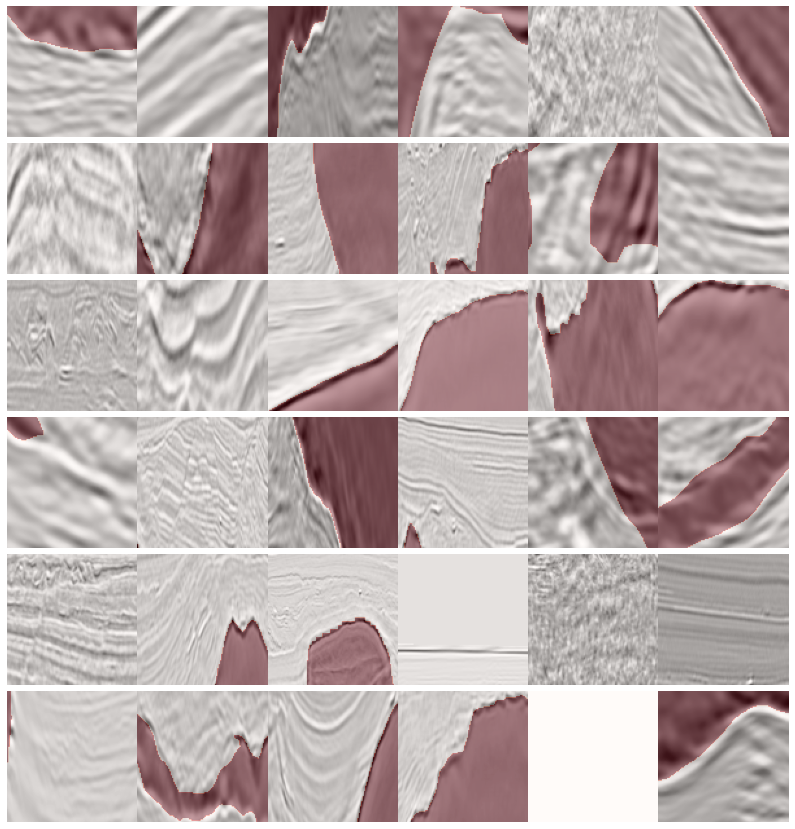

In [7]:
fig = plotImages(x,y,k=6)

Podela podataka: 80% za treniranje i 20% za testiranje

In [8]:
x_train,x_validation,y_train,y_validation = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=50)

In [9]:
print("x_train shape:",x_train.shape)
print("x_validation shape:",x_validation.shape)
print("y_train shape:",y_train.shape)
print("y_validation shape:",y_validation.shape)

x_train shape: (3200, 101, 101)
x_validation shape: (800, 101, 101)
y_train shape: (3200, 101, 101)
y_validation shape: (800, 101, 101)


# Kreiranje CNN modela
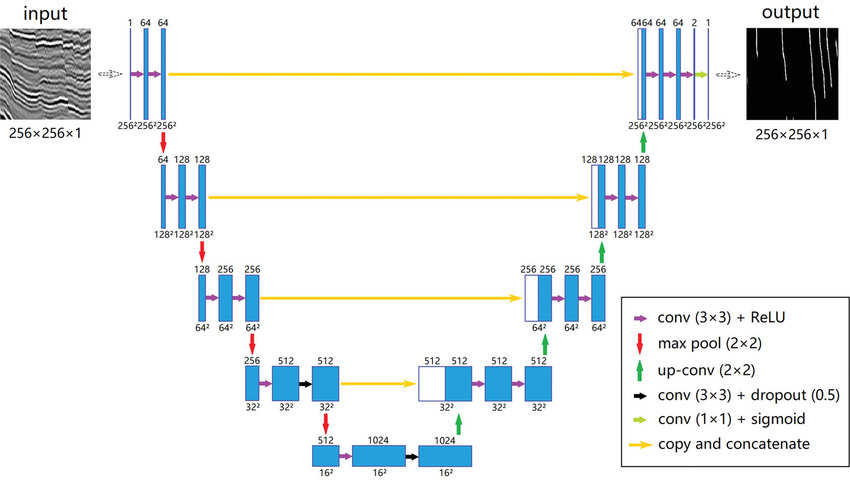

**U-Net** mreza se sastoji se od contracting putanje (leva strana) i expansive putanje (desna strana). Contracting putanju prati tipiƒçna arhitektura konvolucione mre≈æe. Ona podrazumeva ponovljenu primenu dve konvolucije 3x3, nakon ƒçega sledi Rectified Linear Unit (ReLU) i operacija MaxPolling 2x2 sa korakom 2 za downsampling (smanjenje slike). U svakom koraku smanjenja slike udvostruƒçuje se broj kanala. 

Svaki korak u expansive putanji sastoji se od upsampling-a mape obele≈æja pracÃÅenih 2x2 konvolucijom (‚Äûup-convolution‚Äú) koja prepolovljava broj kanala, spajanja sa odgovarajucÃÅom iseƒçenom mapom obele≈æja sa contracting putanje i dve 3x3 konvolucije, nakon kojih sledi ReLU. Uzimanje uzoraka mo≈æe se izvr≈°iti kori≈°cÃÅenjem Transpose Convolution Operation. Cropping je neophodan zbog gubitka graniƒçnih piksela u svakoj konvoluciji. Na zavr≈°nom sloju 1x1 konvolucija se koristi za mapiranje svakog od 64 vektora komponente u ≈æeljeni broj klasa.

In [10]:
def BatchActivate(x):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

#definisanje konvolucionog bloka
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    if activation==True: x = BatchActivate(x)
    return x

#definisanje residual (identity) bloka
def residual_block(blockInput, num_filters=16, batch_activate=False):
    x = BatchActivate(blockInput)
    x = convolution_block(x, num_filters, (3,3))
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    if batch_activate: x = BatchActivate(x)
    return x

Prilikom definisanja modela kombinuju se konvolucioni i residual blokovi kako bi se izgradila ResNet mre≈æa

In [11]:

def build_model(input_layer, start_neurons, DropoutRatio=0.5):
    # 101 -> 50
    conv1 = Conv2D(start_neurons*1, (3,3), activation=None, padding='same')(input_layer)
    conv1 = residual_block(conv1, start_neurons*1)
    conv1 = residual_block(conv1, start_neurons*1, True)
    pool1 = MaxPooling2D((2,2))(conv1)
    pool1 = Dropout(DropoutRatio/2)(pool1)
    print("conv1", conv1)
    # 50 -> 25
    conv2 = Conv2D(start_neurons*2, (3,3), activation=None, padding='same')(pool1)
    conv2 = residual_block(conv2, start_neurons*2)
    conv2 = residual_block(conv2, start_neurons*2, True)
    pool2 = MaxPooling2D((2,2))(conv2)
    pool2 = Dropout(DropoutRatio)(pool2)
    print("conv2", conv2)
    # 25 -> 12
    conv3 = Conv2D(start_neurons*4, (3,3), activation=None, padding='same')(pool2)
    conv3 = residual_block(conv3, start_neurons*4)
    conv3 = residual_block(conv3, start_neurons*4, True)
    pool3 = MaxPooling2D((2,2))(conv3)
    pool3 = Dropout(DropoutRatio)(pool3)
    print("conv3", conv3)
    # 12 -> 6
    conv4 = Conv2D(start_neurons*8, (3,3), activation=None, padding='same')(pool3)
    conv4 = residual_block(conv4, start_neurons*8)
    conv4 = residual_block(conv4, start_neurons*8, True)
    pool4 = MaxPooling2D((2,2))(conv4)
    pool4 = Dropout(DropoutRatio)(pool4)
    print("conv4", conv4)
    # Middle
    convm = Conv2D(start_neurons*16, (3,3), activation=None, padding='same')(pool4)
    convm = residual_block(convm, start_neurons*16)
    convm = residual_block(convm, start_neurons*16, True)
    print("convm", convm)
    # 6 -> 12
    deconv4 = Conv2DTranspose(start_neurons*8, (3,3), strides=(2,2), padding='same')(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(DropoutRatio)(uconv4)
    
    uconv4 = Conv2D(start_neurons*8, (3,3), activation=None, padding='same')(uconv4)
    uconv4 = residual_block(uconv4, start_neurons*8)
    uconv4 = residual_block(uconv4, start_neurons*8, True)
    print("conv4", uconv4)
    # 12 -> 25
    deconv3 = Conv2DTranspose(start_neurons*4, (3,3), strides=(2,2), padding='valid')(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(DropoutRatio)(uconv3)
    
    uconv3 = Conv2D(start_neurons*4, (3,3), activation=None, padding='same')(uconv3)
    uconv3 = residual_block(uconv3, start_neurons*4)
    uconv3 = residual_block(uconv3, start_neurons*4, True)
    print("conv3", uconv3)
    # 25 -> 50
    deconv2 = Conv2DTranspose(start_neurons*2, (3,3), strides=(2,2), padding='same')(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(DropoutRatio)(uconv2)
    
    uconv2 = Conv2D(start_neurons*2, (3,3), activation=None, padding='same')(uconv2)
    uconv2 = residual_block(uconv2, start_neurons*2)
    uconv2 = residual_block(uconv2, start_neurons*2, True)
    print("conv2", uconv2)
    # 50 -> 101
    deconv1 = Conv2DTranspose(start_neurons*1, (3,3), strides=(2,2), padding='valid')(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(DropoutRatio)(uconv1)
    
    uconv1 = Conv2D(start_neurons*1, (3,3), activation=None, padding='same')(uconv1)
    uconv1 = residual_block(uconv1, start_neurons*1)
    uconv1 = residual_block(uconv1, start_neurons*1, True)
    
    output_layer_noActi = Conv2D(1, (1,1), padding='same', activation=None)(uconv1)
    output_layer = Activation('sigmoid')(output_layer_noActi)
    
    return output_layer

Detaljan prikaz svakog sloja mre≈æe

In [12]:
input_layer = Input((101, 101, 1))
output_layer = build_model(input_layer, 32,0.5)

model = Model(input_layer, output_layer)
model.summary()

conv1 KerasTensor(type_spec=TensorSpec(shape=(None, 101, 101, 32), dtype=tf.float32, name=None), name='activation_4/Relu:0', description="created by layer 'activation_4'")
conv2 KerasTensor(type_spec=TensorSpec(shape=(None, 50, 50, 64), dtype=tf.float32, name=None), name='activation_9/Relu:0', description="created by layer 'activation_9'")
conv3 KerasTensor(type_spec=TensorSpec(shape=(None, 25, 25, 128), dtype=tf.float32, name=None), name='activation_14/Relu:0', description="created by layer 'activation_14'")
conv4 KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 256), dtype=tf.float32, name=None), name='activation_19/Relu:0', description="created by layer 'activation_19'")
convm KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 512), dtype=tf.float32, name=None), name='activation_24/Relu:0', description="created by layer 'activation_24'")
conv4 KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 256), dtype=tf.float32, name=None), name='activation_29/Relu:0', description="cre

Kompajliranje modela s obzirom da to zahteva Keras

In [13]:
# binary cross entropy izraƒçunava loss izmeƒëu stvarnih i predviƒëenih vrednosti
# Adam je optimizator koji koristi Adam optimizacioni algoritam koji se mo≈æe koristiti 
# umesto klasiƒçne stohastiƒçke gradiant descent procedure za prilagoƒëavanje stope uƒáenja (a≈æuriranje te≈æina veza i minimizaciju gre≈°ke)  
model.compile(loss = "binary_crossentropy", optimizer= "adam", metrics= ["accuracy"])

Kako biste u≈°tedeli 11h ƒçekanja na treniranje modela, mo≈æete preskoƒçiti sledeƒáu ƒáeliju sa kodom i uƒçitati model koji sam ja veƒá prethodno istrenirao

In [14]:
# Early stopping je tehnika koja se koristi da prekine obuku modela u sluƒçaju da ≈æeljeni (prosleƒëeni) parametri prestanu da se pobolj≈°avaju
# Na kraju svake epohe se proverava da li prosleƒëena metrika (u ovom slucaju tacnost na validacionom skupu - val_accuracy) raste za minimalnu vrednost od 0.001
# i ukoliko to nije sluƒçaj ni nakon 10 epoha (patience = 10) prekinuƒáe se treniranje modela, a sve u cilju kako bi se smanjio overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr=0.00000005, verbose=1)

history = model.fit(x_train, y_train, validation_data=(x_validation,y_validation), epochs = 15, batch_size = 128, callbacks = [early_stopping, model_checkpoint, reduce_LR])

Epoch 1/15
25/25 [==============================] - 2639s 105s/step - loss: 0.5123 - accuracy: 0.7585 - val_loss: 11.3688 - val_accuracy: 0.2544

Epoch 00001: val_accuracy improved from -inf to 0.25438, saving model to ./keras.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./keras.model/assets
Epoch 2/15
25/25 [==============================] - 2618s 105s/step - loss: 0.3492 - accuracy: 0.8769 - val_loss: 9.4210 - val_accuracy: 0.3818

Epoch 00002: val_accuracy improved from 0.25438 to 0.38178, saving model to ./keras.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./keras.model/assets
Epoch 3/15
25/25 [==============================] - 2627s 105s/step - loss: 0.2987 - accuracy: 0.8949 - val_loss: 3.6166 - val_accuracy: 0.5971

Epoch 00003: val_accuracy improved from 0.38178 to 0.59713, saving model to ./keras.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./keras.model/assets
Epoch 4/15
25/25 [==============================] - 2608s 104s/step - loss: 0.2792 - accuracy: 0.8978 - val_loss: 6.7606 - val_accuracy: 0.2948

Epoch 00004: val_accuracy did not improve from 0.59713
Epoch 5/15
25/25 [==============================] - 2608s 104s/step - loss: 0.2667 - accuracy: 0.8987 - val_loss: 4.5742 - val_accuracy: 0.4942

Epoch 00005: val_accuracy did not improve from 0.59713
Epoch 6/15
25/25 [==============================] - 2597s 104s/step - loss: 0.2551 - accuracy: 0.9023 - val_loss: 8.5282 - val_accuracy: 0.2546

Epoch 00006: val_accuracy did not improve from 0.59713
Epoch 7/15
25/25 [==============================] - 2575s 103s/step - loss: 0.2319 - accuracy: 0.9140 - val_loss: 9.8596 - val_accuracy: 0.2546

Epoch 00007: val_accuracy did not improve from 0.59713
Epoch 8/15
25/25 [==============================] - 2579s 103s/step - loss: 0.2210 - accuracy: 0.9174 - val_loss: 4.7175 - val_accuracy: 0.2720


Pokrenite ƒáeliju ispod kako biste uƒçitali prethodno istrenirani model ukoliko ste preskoƒçili prethonu ƒáeliju, u suprotnom preskoƒçite ovu

In [ ]:
model = load_model('/content/keras.model')

In [ ]:
model.summary()

Prikaz histograma sa porƒëenjem vrednosti za taƒçnost (accuracy) i gubitak (loss) na skupu podataka za trening i test tokom razliƒçitih epoha treniranja modela

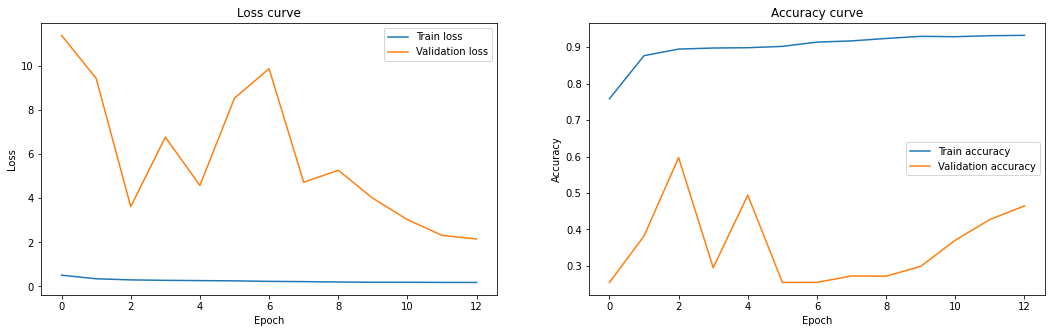

In [15]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(18, 5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.set_xlabel("Epoch")
ax_loss.set_ylabel("Loss")
ax_loss.set_title("Loss curve")
ax_loss.legend()
ax_acc.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
ax_acc.set_xlabel("Epoch")
ax_acc.set_ylabel("Accuracy")
ax_acc.set_title("Accuracy curve")
ax_acc.legend()


In [17]:
result = model.evaluate(x_validation, y_validation)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

25/25 [==============================] - 143s 6s/step - loss: 2.1492 - accuracy: 0.4645
[+] Accuracy: 46.45%


Kao ≈°to se mo≈æe videti taƒçnost i nije mnogo velika i iznosi 46.45%

# Predikcija na validacionom setu

Nakon ≈°to je model istreniran vr≈°i se predikcija na validacionom setu.

U nastavku su predstavljene nasumiƒçno odabrane slike na kojima je crvenom bojom oznaƒçena maska koja ozaƒçava stvarne vrednosti koje predstavljaju so (vrednost piksela maske je 1) dok su zelenom bojom obojene predikcije dobijene na osnovu prethodno istreniranog modela. 

In [38]:
pred_validation = model.predict(x_validation)
pred_validation = pred_validation[:,:,:,0]
print(x_validation.shape, y_validation.shape)

(800, 101, 101) (800, 101, 101)


In [39]:
def plotValidationImages(file1, file2, file3, k, alpha1, alpha2):
  fig, ax = plt.subplots(nrows=k, ncols=k, figsize=(15,15))
  for i in range(k):
    for j in range(k):
      ind = randint(0, file1.shape[0]-1)
      ax[i,j].imshow(file1[ind], cmap='Greys')
      ax[i,j].imshow(file2[ind], cmap='Reds', alpha = alpha1)
      ax[i,j].imshow(file3[ind], cmap='Greens', alpha = alpha2)
      ax[i,j].set_axis_off()
  fig.subplots_adjust(wspace = -0.30, hspace= 0.05)
  plt.suptitle("Crvena: so    Zelena: predikcija")
  return(fig)

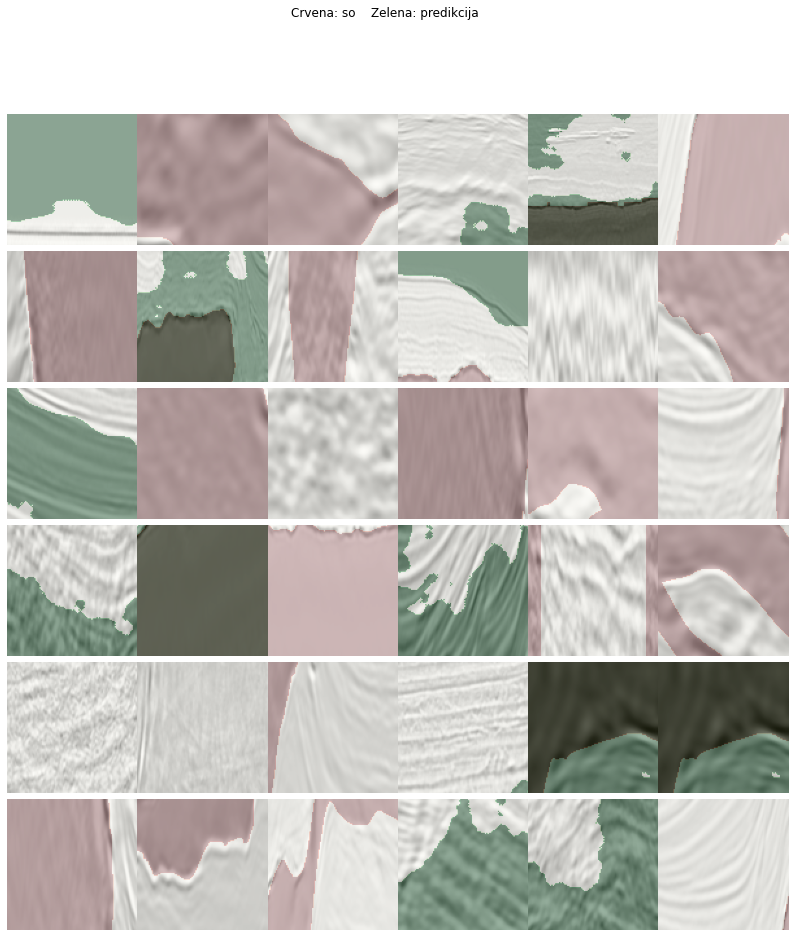

In [48]:
fig = plotValidationImages(x_validation, y_validation, np.round(pred_validation), k = 6, alpha1=0.4, alpha2=0.4)

# **IOU** (Intersection over Union) metrika

IOU je evaluaciona metrika koja se najƒçe≈°ƒáe koristi u oblasti detekcije objekata da oznaƒçi taƒçnost detekcije, dok se u mom primeru koristi da oznaƒçi sliƒçnost izmeƒëu regiona koji stvarno predstavljaju so i onih koji su dobije predikcijom.

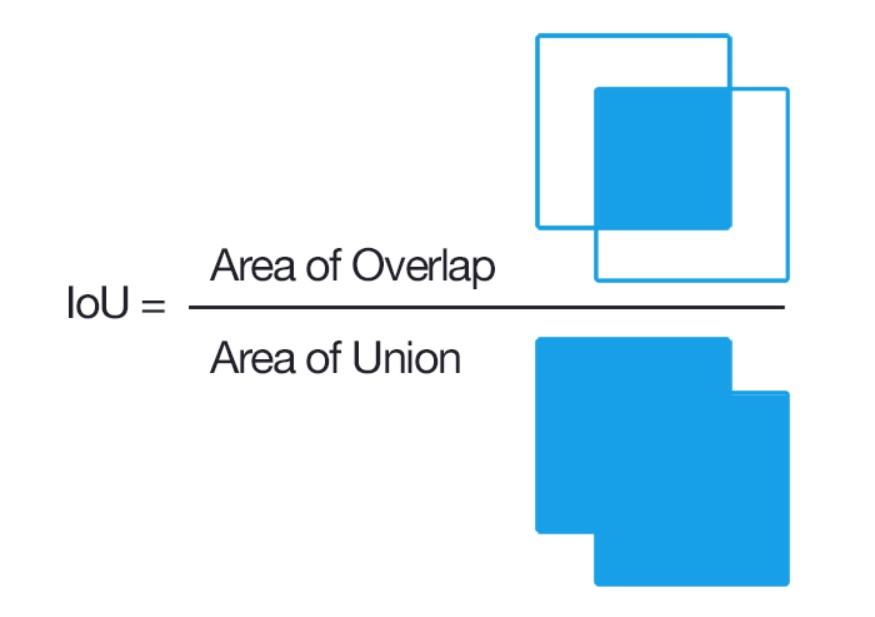

Kako ova metrika predstavlja odnos izmedju zajedniƒçkih delova dva regiona (maske i predikcije), odnosno njihovog preseka i unije ta dva regiona, jasno je da ≈°to je vrednost ove metrike bli≈æa 1 to je predikcija taƒçnija i model bolji.

In [57]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in

    true_objects = 2
    pred_objects = 2

    temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=([0,0.5,1], [0,0.5, 1]))

    intersection = temp1[0]

    area_true = np.histogram(labels,bins=[0,0.5,1])[0]
    area_pred = np.histogram(y_pred, bins=[0,0.5,1])[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Izraƒçunava se unija
    union = area_true + area_pred - intersection
      
    # Iskljuƒçuejmo pozadinu iz analize
    intersection = intersection[1:,1:]
    intersection[intersection == 0] = 1e-9
    
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Izraƒçunava se vrednost IOU metrike
    iou = intersection / union

    # Pomoƒána funkcija preciznosti
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # taƒçno pogodjeni objekti
        false_positives = np.sum(matches, axis=0) == 0  # pogre≈°no klasifikovani objekti
        false_negatives = np.sum(matches, axis=1) == 0  # objekti koji su pogre≈°no prepoznati kao negativni
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Prolazak kroz threshold iou vrednosti
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    # np.arrange vraca ravnomerno rasporeƒëene vrednosti unutar intervala 0.5 i 1.0 sa korakom od 0.05
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [59]:
thresholds = np.linspace(0.3, 0.7, 31)
ious = np.array([iou_metric_batch(y_validation, np.int8(pred_validation > threshold)) for threshold in thresholds])
print(ious)

[0.191125 0.191625 0.194375 0.19625  0.197125 0.197625 0.198375 0.19875
 0.20025  0.200375 0.204375 0.20475  0.206375 0.20675  0.20725  0.209125
 0.209625 0.21125  0.21175  0.21375  0.215625 0.2165   0.21675  0.21875
 0.219875 0.2205   0.22125  0.224125 0.2315   0.233375 0.2365  ]


In [60]:
threshold_best_index = np.argmax(ious) 
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]
print("threshold best",threshold_best)
print("iou best",iou_best)

threshold best 0.7
iou best 0.2365


Mo≈æe se videti da je dobijena vrednost IOU metrike priliƒçno mala, te da bi bilo potrebno prilagoditi model kako bi kasnije predikcije bile bolje.

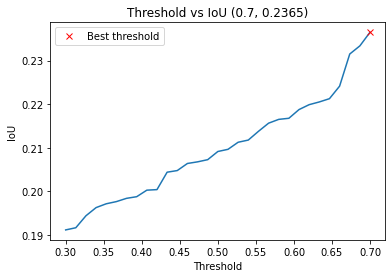

In [61]:
plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

Prikaz nasumiƒçno odabranih forografija nakon ≈°to je odraƒëena IOU metrika

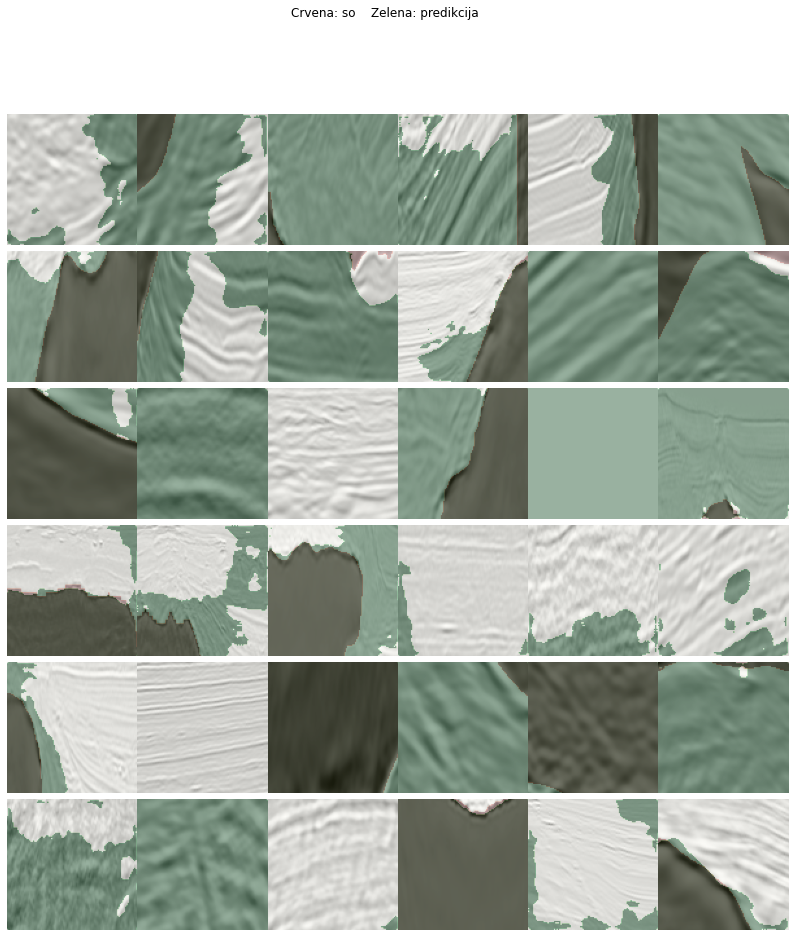

In [64]:
fig = plotValidationImages(x_validation, y_validation, np.int32(pred_validation > threshold_best), k = 6, alpha1=0.4, alpha2=0.4)